<a href="https://colab.research.google.com/github/auramadera/auramadera/blob/main/CasoPracticoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CasoPractico_IA&MachineLearnig"
author: Aura Madera
date: 22/12/2021

Modelo predictivo basado en la regresión para calcular el precio de una vivienda en función de las distintas variables del dataset público encontrado en Kaggle: housedata, 

# 1. Recolección de datos

In [1]:
#Importar fichero local
from google.colab import files 
uploaded = files.upload ()

Saving data.csv to data.csv


In [2]:
# importar librerias

import pandas as pd #analisis exploratorio
import numpy as np #algrebra lineal

In [3]:
#crear variable con dataset
import io
house_data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

#2. Análisis exploratorio de los datos

In [4]:
# Mostrar nombre de las columnas
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
#conocemos el número de filas y columnas
house_data.shape

(4600, 18)

Nuestro dataset esta compuesto por 4,600 filas y 18 columnas.

In [6]:
# visualizar datos
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [7]:
#Visualizar primeras filas de dataset
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
#consultar datos estadisticos
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [9]:
#consultar tipos de variables
house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Las variables de nuestro dataset son tipo object, float, e int.

In [77]:
#valores perdidos
house_data.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [78]:
#eliminar valores perdidos
house_data.dropna(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [79]:
#mostrar dataset
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


  # 2.1. Análisis visual de los datos

In [80]:
# Importar librerias gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

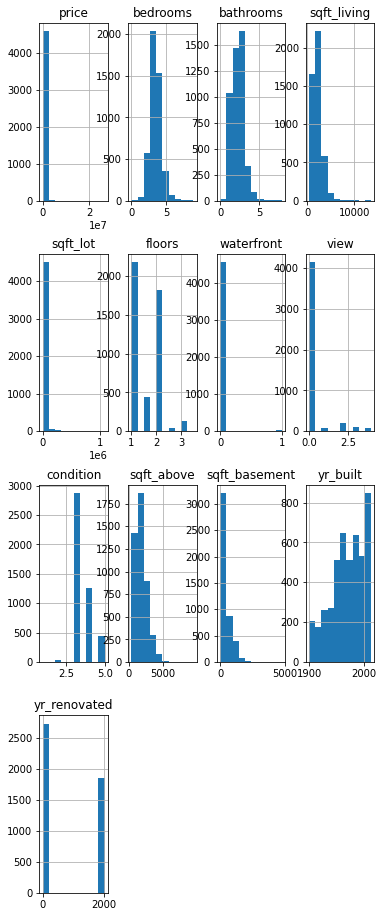

In [81]:
#visualizacion histograma
house_data.hist(figsize=(6,16))
plt.show()

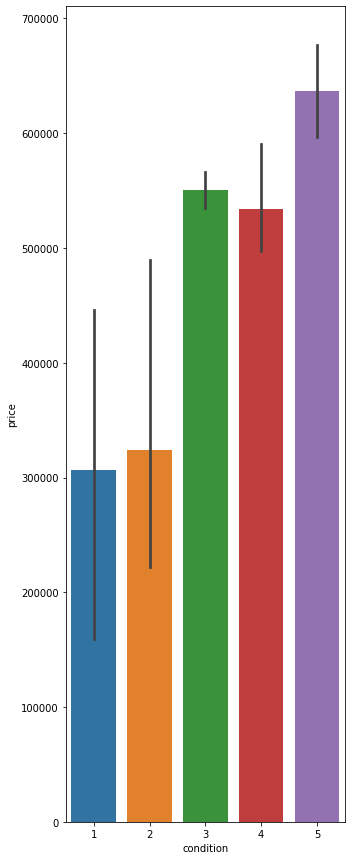

In [82]:
#visualización barplot de las variables condition price
plt.figure(figsize=(5,15))
sns.barplot(x=house_data["condition"],y=house_data["price"])

Se observa que mejor condición mayor el precio de la vivienda.

Text(0.5, 1.0, 'Distribution of house_data price')

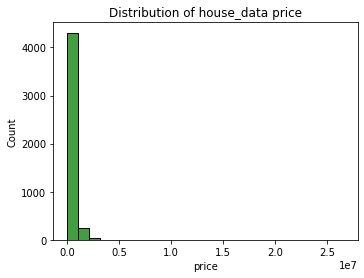

In [83]:
#visualizacion distribucion variable price
f=plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(house_data['price'],bins=25,color='g',ax=ax)
ax.set_title('Distribution of house_data price')

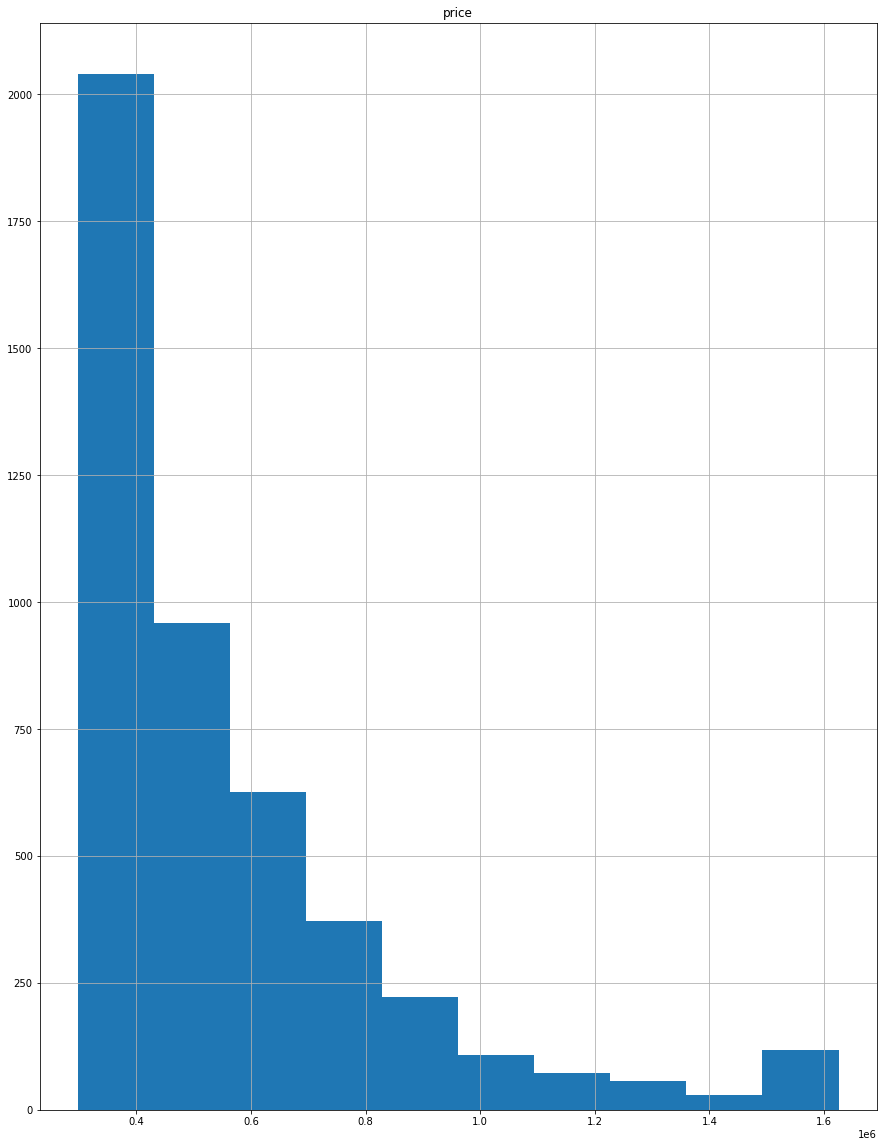

In [84]:
# eliminamos outlier

def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

#eliminamos los outlier de la variable precio
prueba=house_data[["price"]]
prueba=prueba.apply(lambda x: outlier_tret(x))

# Visualizacion histogramas de la variable precio
prueba.hist(figsize=(15,20))
plt.show()

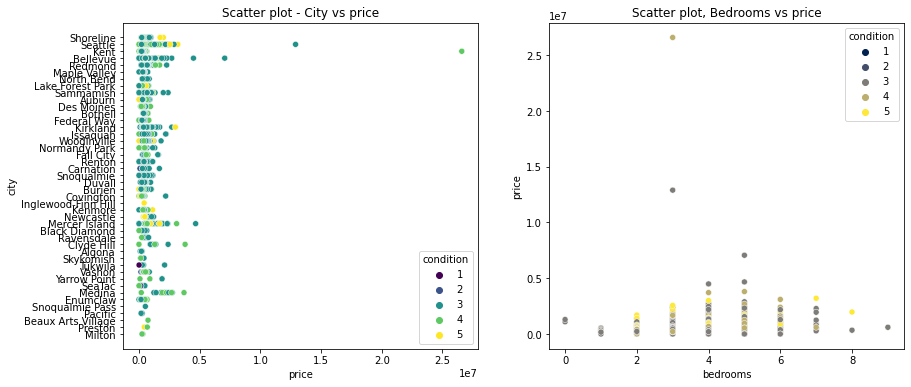

In [85]:
# visualizacion distribucion variable  Condition vs price y vs bedrooms

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot (x='price', y='city',data=house_data,palette='viridis',hue='condition',ax=ax)
ax.set_title('Scatter plot - City vs price')

ax = f.add_subplot(122)
sns.scatterplot (x='bedrooms', y='price',data=house_data,palette='cividis',hue='condition')
ax.set_title('Scatter plot, Bedrooms vs price')
plt.savefig('sc.png');


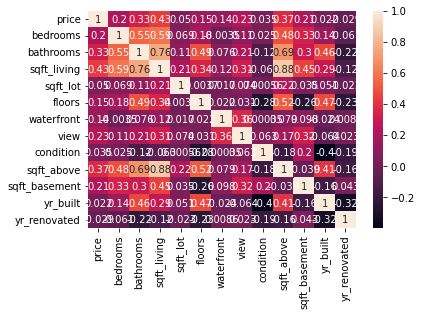

In [86]:
#correlacion de variables
corr = house_data.corr()
sns.heatmap(corr, annot= True)

In [16]:
#consultar valores nulos
house_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# 3. Fase de entrenamiento

Hipotesis 1: Entrenamiento utilizando variables numericas. Dado que los modelos solo aceptan variables númericas, vamos a eliminar todas aquellas variables que no lo son.

Preparación del dataset de la hipotesis:

In [157]:
#borramos las columnas categoricas
categorical_columns = ['street', 'city', 'statezip', 'country', 'date']
house_data_hipot1= house_data.drop(categorical_columns,axis=1)


In [158]:
# revisamos el dataset
house_data_hipot1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [160]:
#variable independiente
x_hipot1 = house_data_hipot1.drop('price', axis=1)
#variable dependiente
y_hipot1 = house_data_hipot1['price']

In [161]:
#prepación train data y test data
from sklearn.model_selection import train_test_split
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [162]:
#regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot1_train, y_hipot1_train)

LinearRegression()

3.1 Fase de Validación

In [163]:
#importar el calculo del error medio cuadratico
from sklearn.metrics import mean_squared_error

In [164]:
#predicion de los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

#se calcula el Error Medio Cuadratico (MSE)
nse_hipot1_train = mean_squared_error(y_true= y_hipot1_train, y_pred = prediccion_entrenamiento)
#imprimimos el resultado
print('Error Cuadratico Medio (MSE) TRAIN=' + str(nse_hipot1_train))

#predicion de los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)
#se calcula el Error Medio Cuadratico (MSE)
nse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
#imprimimos el resultado
print('Error Cuadratico Medio (MSE) TEST=' + str(nse_hipot1_test))

Error Cuadratico Medio (MSE) TRAIN=292440342188.2669
Error Cuadratico Medio (MSE) TEST=74834240426.81778


Hipótesis 2: transformamos las variables categoricas en variables numéricas

In [165]:
#programar dataset de la hipotesis 2
#tecnica de once_hot_encoding
categorical_columns = ['street', 'city', 'statezip', 'country', 'date']

In [166]:
#programar dataset de la hipotesis 2
house_data_hipot2 = pd.get_dummies(data=house_data, prefix= 'DME', prefix_sep='_',
                                       columns = categorical_columns,
                                       drop_first =True,
                                       dtype= 'int8')

In [168]:
#revisamos el dataset
house_data_hipot2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,DME_10 W Etruria St,DME_100 20th Ave E,DME_100 24th Ave E,DME_100 Mt Si Pl NW,DME_1000 Mountain View Blvd SE,DME_10000-10026 S 100th St,DME_10005 16th Ave S,DME_10009 SE 247th Pl,DME_1001 SW 102nd St,DME_1001 Whitman Ct NE,DME_10010 37th Ave SW,DME_10010 44th Ave SW,DME_10012 SE 244th Ct,DME_1002 Pike St NE,DME_10020 18th Ave SW,DME_10022 19th Ave SW,DME_10022 NE 110th St,DME_10025-10037 31st Ave SW,DME_10026 61st Ave S,DME_1003 SW 307th St,DME_10030 44th Ave SW,DME_10037 Interlake Ave N,DME_10041 64th Ave S,DME_10050 11th Ave NW,DME_10050 19th Ave SW,DME_1006 N 5th St,DME_1006 NE Ravenna Blvd,...,DME_2014-06-01 00:00:00,DME_2014-06-02 00:00:00,DME_2014-06-03 00:00:00,DME_2014-06-04 00:00:00,DME_2014-06-05 00:00:00,DME_2014-06-06 00:00:00,DME_2014-06-07 00:00:00,DME_2014-06-08 00:00:00,DME_2014-06-09 00:00:00,DME_2014-06-10 00:00:00,DME_2014-06-11 00:00:00,DME_2014-06-12 00:00:00,DME_2014-06-13 00:00:00,DME_2014-06-14 00:00:00,DME_2014-06-15 00:00:00,DME_2014-06-16 00:00:00,DME_2014-06-17 00:00:00,DME_2014-06-18 00:00:00,DME_2014-06-19 00:00:00,DME_2014-06-20 00:00:00,DME_2014-06-21 00:00:00,DME_2014-06-22 00:00:00,DME_2014-06-23 00:00:00,DME_2014-06-24 00:00:00,DME_2014-06-25 00:00:00,DME_2014-06-26 00:00:00,DME_2014-06-27 00:00:00,DME_2014-06-28 00:00:00,DME_2014-06-29 00:00:00,DME_2014-06-30 00:00:00,DME_2014-07-01 00:00:00,DME_2014-07-02 00:00:00,DME_2014-07-03 00:00:00,DME_2014-07-04 00:00:00,DME_2014-07-05 00:00:00,DME_2014-07-06 00:00:00,DME_2014-07-07 00:00:00,DME_2014-07-08 00:00:00,DME_2014-07-09 00:00:00,DME_2014-07-10 00:00:00
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
#variable independiente
x_hipot2 = house_data_hipot2.drop('price', axis=1)
#variable dependiente
y_hipot2 = house_data_hipot2['price']

In [170]:
#prepación train data y test data
from sklearn.model_selection import train_test_split
x_hipot2_train, x_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(x_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [171]:
#regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot2_train, y_hipot2_train)

LinearRegression()

3.2 Fase de validación

In [172]:
#predicion de entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_train)

#calculamos el Error Medio Cuadretico (MSE)
nse_hipot2_train = mean_squared_error(y_true= y_hipot2_train, y_pred = prediccion_entrenamiento)

#presentamos nuestros resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TRAIN = ' + str(nse_hipot1_train))
print('Error Cuadratico Medio (MSE) HIPO 2 TRAIN = ' + str(nse_hipot2_train))

#predicion de los valores y para los datos en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_test)

#calculamos el Error Medio Cuadretico (MSE)
nse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)

#presentamos nuestros resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TEST = ' + str(nse_hipot1_test))
print('Error Cuadratico Medio (MSE) HIPO 2 TEST = ' + str(nse_hipot2_test))

Error Cuadratico Medio (MSE) HIPO 1 TRAIN = 292440342188.2669
Error Cuadratico Medio (MSE) HIPO 2 TRAIN = 6.655289779132776e-10
Error Cuadratico Medio (MSE) HIPO 1 TEST = 74834240426.81778
Error Cuadratico Medio (MSE) HIPO 2 TEST = 286047211694.5673


Hipotesis 3. Normalizar la variable objetivo

In [174]:
#preparamos el dataset de la hipotesis 3
house_data_hipot3 = pd.get_dummies(data=house_data, prefix= 'DME', prefix_sep='_',
                                       columns = categorical_columns,
                                       drop_first =True,
                                       dtype= 'int8')

In [175]:
#variable independiente
x_hipot3 = house_data_hipot3.drop('price', axis=1)
#variable dependiente
y_hipot3 = house_data_hipot3['price']

In [176]:
#Escalamos la variable charges para estendarizarla
from sklearn.preprocessing import  StandardScaler
scaler= StandardScaler()

#transformacion de variable
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
#se vuelve a transformar la variable
y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [177]:
#programar train data y test data
x_hipot3_train, x_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(x_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [178]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot3_train, y_hipot3_train)

LinearRegression()

3.3 Fase de validación

In [179]:
#predicion de los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_train)

#calcular el Error Medio Cuadratico (MSE)
nse_hipot3_train = mean_squared_error(y_true= y_hipot3_train, y_pred = prediccion_entrenamiento)
#Mostrar resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TRAIN = ' + str(nse_hipot1_train))
print('Error Cuadratico Medio (MSE) HIPO 2 TRAIN = ' + str(nse_hipot2_train))
print('Error Cuadratico Medio (MSE) HIPO 3 TRAIN = ' + str(nse_hipot3_train))

# calculo Error Cuadratico Medio (MSE)
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_test)
nse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
#Mostrar resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TEST = ' + str(nse_hipot1_test))
print('Error Cuadratico Medio (MSE) HIPO 2 TEST = ' + str(nse_hipot2_test))
print('Error Cuadratico Medio (MSE) HIPO 3 TEST = ' + str(nse_hipot3_test))

Error Cuadratico Medio (MSE) HIPO 1 TRAIN = 292440342188.2669
Error Cuadratico Medio (MSE) HIPO 2 TRAIN = 6.655289779132776e-10
Error Cuadratico Medio (MSE) HIPO 3 TRAIN = 2.1280195723358893e-21
Error Cuadratico Medio (MSE) HIPO 1 TEST = 74834240426.81778
Error Cuadratico Medio (MSE) HIPO 2 TEST = 286047211694.5673
Error Cuadratico Medio (MSE) HIPO 3 TEST = 0.8999710445190381


HIPOTESIS 4: Utilizando otro tipo de escalar

In [209]:
#preparamos el dataset de la hipotesis 4
house_data_hipot4 = pd.get_dummies(data=house_data, prefix= 'DME', prefix_sep='_',
                                       columns = categorical_columns,
                                       drop_first =True,
                                       dtype= 'int8')

In [210]:
#Scaling Data
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
house_data_hipot4[["yr_renovated","price"]] = scaler.fit_transform(house_data_hipot4[["yr_renovated","price"]] )

In [211]:
#variable independiente
x_hipot4 = house_data_hipot4.drop('price', axis=1)
#variable dependiente
y_hipot4 = house_data_hipot4['price']

In [212]:
#programar train data y test data
x_hipot4_train, x_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(x_hipot4, y_hipot4, test_size=0.20, random_state=43)
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot4_train, y_hipot4_train)

LinearRegression()

3.4 Fase de validación



In [213]:
#predicion de los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_train)

#calcular el Error Medio Cuadratico (MSE)
nse_hipot4_train = mean_squared_error(y_true= y_hipot4_train, y_pred = prediccion_entrenamiento)
#Mostrar resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TRAIN = ' + str(nse_hipot1_train))
print('Error Cuadratico Medio (MSE) HIPO 2 TRAIN = ' + str(nse_hipot2_train))
print('Error Cuadratico Medio (MSE) HIPO 3 TRAIN = ' + str(nse_hipot3_train))
print('Error Cuadratico Medio (MSE) HIPO 4 TRAIN = ' + str(nse_hipot4_train))

#predicion de los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_test)
# calculo Error Cuadratico Medio (MSE)
nse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
#Mostrar resultados
print('Error Cuadratico Medio (MSE) HIPO 1 TEST = ' + str(nse_hipot1_test))
print('Error Cuadratico Medio (MSE) HIPO 2 TEST = ' + str(nse_hipot2_test))
print('Error Cuadratico Medio (MSE) HIPO 3 TEST = ' + str(nse_hipot3_test))
print('Error Cuadratico Medio (MSE) HIPO 4 TEST = ' + str(nse_hipot4_test))

Error Cuadratico Medio (MSE) HIPO 1 TRAIN = 292440342188.2669
Error Cuadratico Medio (MSE) HIPO 2 TRAIN = 6.655289779132776e-10
Error Cuadratico Medio (MSE) HIPO 3 TRAIN = 2.1280195723358893e-21
Error Cuadratico Medio (MSE) HIPO 4 TRAIN = 3.044612384773427e-24
Error Cuadratico Medio (MSE) HIPO 1 TEST = 74834240426.81778
Error Cuadratico Medio (MSE) HIPO 2 TEST = 286047211694.5673
Error Cuadratico Medio (MSE) HIPO 3 TEST = 0.8999710445190381
Error Cuadratico Medio (MSE) HIPO 4 TEST = 0.00040457816328388603


Por medio de la comprobación de Hipotesís se puede observar que el modelado más acertado es el de la hipotesís 3 para el TRAIN y la Hipotesís 4 para el TEST.
Se puede Observar que los valores del Error Cuadratico Medio (MSE) de la hiportesis 4 TEST, es mas cercanos a 0, que las hipotesis anteriores, lo que demuestra que es nuestra mejor hipotesis.